# 다중 회귀
- 특성이 여러 개

# 다항회귀
- 차수를 높이는 개념
- 각 특성의 거듭제곱을 하나의 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것
- 선형회귀라고 말 하는 이유: 치환을 통해 하나의 선형적인 회귀식으로 만들 수 있어서
- 선형/비선형 구분: 회귀 계수에 따라서 분류

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
boston=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Boston_house.csv')
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [4]:
x=np.array(boston['RM'])
y=np.array(boston['Target'])
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [6]:
lr=LinearRegression()

## 다항회귀

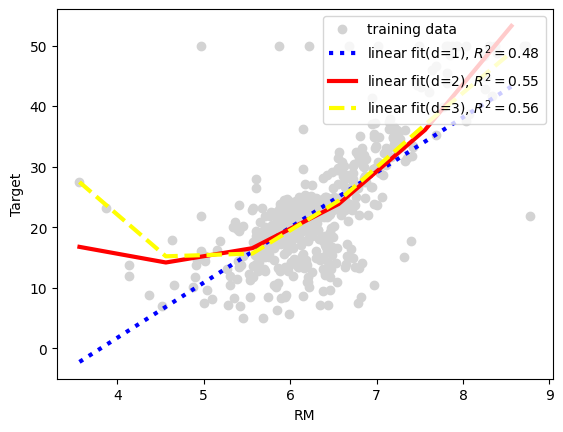

In [9]:
quadrastic=PolynomialFeatures(degree=2)   # 2차
cubic=PolynomialFeatures(degree=3)        # 3차

x_quad=quadrastic.fit_transform(x)
x_cubic=cubic.fit_transform(x)

##단순회귀식 계산
x_fit = np.arange(x.min(), x.max(), 1 )[:, np.newaxis]
lr.fit(x,y)
y_lin_fit = lr.predict(x_fit)
l_r2 = r2_score(y, lr.predict(x))

#2차 다항회귀 모델
lr.fit(x_quad,y)
y_quad_fit = lr.predict(quadrastic.fit_transform(x_fit))
q_r2 = r2_score(y, lr.predict(x_quad))

#3차 다항회귀 모델
lr.fit(x_cubic,y)
y_cubic_fit = lr.predict(cubic.fit_transform(x_fit))
c_r2 = r2_score(y, lr.predict(x_cubic))

# 그래프 그리기
plt.scatter(x,y, label= 'training data', c = 'lightgray')
plt.plot(x_fit, y_lin_fit, linestyle = ':', label = 'linear fit(d=1), $R^2=%.2f$' %l_r2, c='blue',lw=3)
plt.plot(x_fit, y_quad_fit, linestyle = '-', label = 'linear fit(d=2), $R^2=%.2f$' %q_r2, c='red',lw=3)
plt.plot(x_fit, y_cubic_fit, linestyle = '--', label = 'linear fit(d=3), $R^2=%.2f$' %c_r2, c='yellow',lw=3)

plt.ylabel('Target')
plt.xlabel('RM')
plt.legend(loc=1)
plt.show()

- 차수가 올라갈수록 과적합 가능성 높아지니 주의

In [20]:
X = np.arange(4).reshape(2,2)
print('1차 단항삭의 계수 피처 ',X)

# 2차 3차로 바뀌는 방식이 무엇인지를 이해해 보면
# 2차 다항식
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수',poly_ftr)

# 3차 다항식
cubic = PolynomialFeatures(degree=3)
cubic.fit(X)
cubic_ftr = cubic.transform(X)
print('변환된 3차 다항식 계수',cubic_ftr)

1차 단항삭의 계수 피처  [[0 1]
 [2 3]]
변환된 2차 다항식 계수 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]
변환된 3차 다항식 계수 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


## 과적합 확인

Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.
Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.
Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


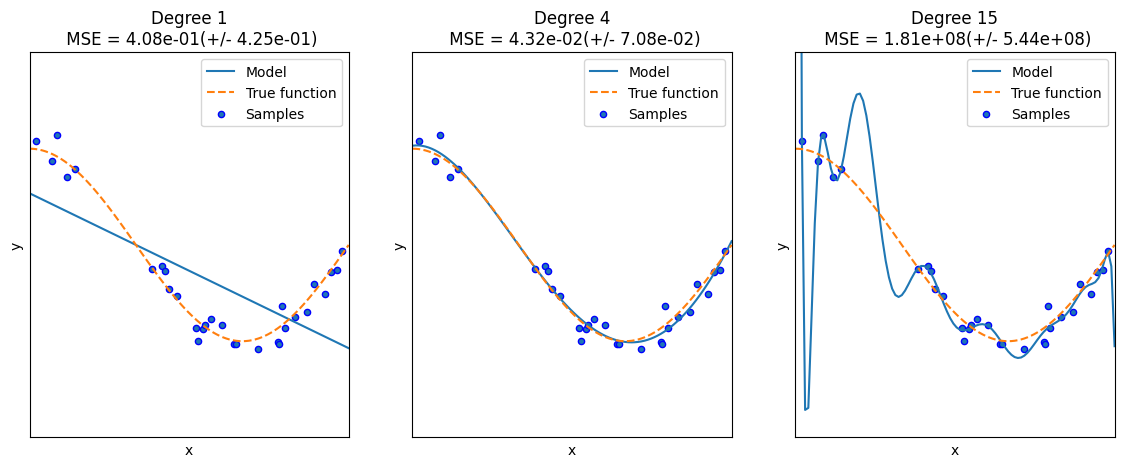

In [22]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 x의 값에 대해 코사인 변환 값을 반환
def true_func(X):
    return np.cos(1.5*np.pi*X)

#X는 0부터 1까지 30개 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_funt()에서 노이즈 변동 값 더한 값

y = true_func(X)+np.random.randn(n_samples)*0.1

plt.figure(figsize=(14,5))
degrees = [1,4,15]

#다항 회귀의 차수 degree를 변화하면서 비교

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    #개별 degree별로 polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias =False)
    linear_regression = LinearRegression()
    pipeline= Pipeline([('polynomial_features',polynomial_features),
                      ('linear_regression',linear_regression)])

    pipeline.fit(X.reshape(-1,1),y)

    #교차 검증으로 다항 회귀 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    #Pipeline을 구성하는 세부 객체 named_steps 이용해 회귀 계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('Degree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    #0 부터 1까지 테스트 데이터 세트를 100개로 나눠서 예측 수행
    # 테스트 데이터 세트에 호귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    #실제값 곡선
    plt.plot(X_test, true_func(X_test),'--',label='True function')
    plt.scatter(X,y, edgecolor='b', s=20, label='Samples')

    plt.xlabel('x');plt.ylabel('y');plt.xlim((0,1));plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\n MSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

#규제
- 최대한 선형 모델의 비용함수 값이 가장 낮은 값을( 최소화 ) 찾기 위해서 노력하다보면 과적합 가능성
- 실제 테스트 데이터에 맞지 않을 수 있기 때문에 규제를 가함


---

- 비용함수 = 학습데이터 잔차의 오류를 최소화 + 회귀계수의 크기를 제어
>비용함수 = Min(RSS(W)) + alpha*||W||

- 전에 배웠던 것은 Min(RSS(W)) 최소화 하는 것
- 지금 배우는 규제는 alpha*||W|| 회귀 계수에 대한 규제
- alpha 값을 작게 하거나, W값을 작은 값으로 조정
- 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 방법과 과적합을 방지하기 위해 회귀 계수가 커지지 않도록 하는 방법이 서로 균형을 이뤄야 함
- 따라서 회귀 계수의 크기를 제어하여 과적합을 개선하기 위해 비용 함수를 변경해야 함
>비용함수에 alpha 값으로 패널티를 부여해서 회귀 계수의 값의 크기를 감소시켜 과소적합하는 방식이 규제

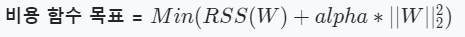

---
1. L1 는 **W 절대값에 패널티**를 부여하는 방식 - 라쏘 회귀
2. L2 는 **W의 제곱에 패널티**를 부여하는 방식 - 릿지 회귀
3. **L1+L2** 형식으로 합쳐진 게 엘라스틱넷



In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets
import numpy as np

# L2 - 릿지 회귀

In [24]:
#데이터 분할
y = np.array(boston['Target'])
X = boston.drop(['Target'], axis=1, inplace=False)

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

#회귀식
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds= lr.predict(X_test)                 # 예측값
mse = mean_squared_error(y_test, y_preds)   # mse로 성능 측정
lr_rmse= np.sqrt(mse)

# 일반 cross_val
lr_neg_mse_scores = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error',cv=5)
lr_rmse_scores = np.sqrt(-1*lr_neg_mse_scores)
lr_avg_rmse = np.mean(lr_rmse_scores)


# 릿지
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('선형회귀', lr_avg_rmse)
print('릿지',avg_rmse)

선형회귀 4.965745258103665
릿지 5.0062660113024995


### alpha 파라미터값 조정

In [25]:
alphas = [0,0.1, 1, 10, 100]

# alpha 리스트 평균 rmse

for alpha in alphas:
    ridge=Ridge(alpha= alpha)
    #cross val score cv 5 RMSE
    neg_mse_scores = cross_val_score(ridge,X_train, y_train, scoring = 'neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE : 4.966
alpha 0.1일 때 5 folds의 평균 RMSE : 4.966
alpha 1일 때 5 folds의 평균 RMSE : 4.984
alpha 10일 때 5 folds의 평균 RMSE : 5.006
alpha 100일 때 5 folds의 평균 RMSE : 5.071


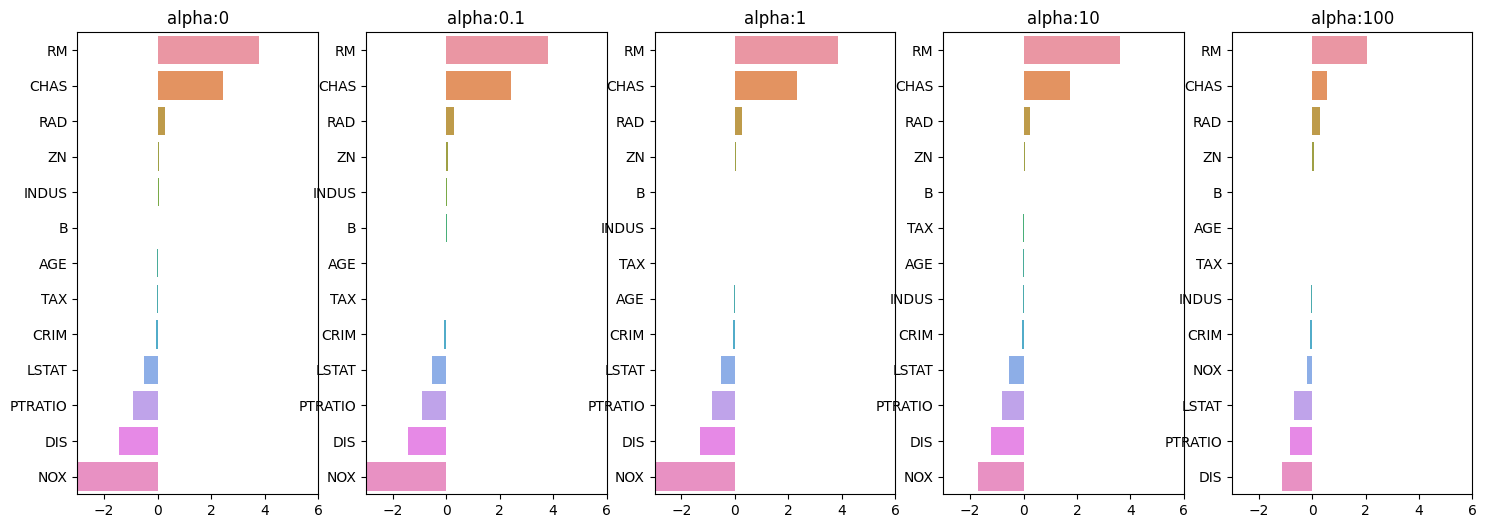

In [26]:
# 각 alpha에 따른 회귀 계수 값을 시각하기 위해 5개 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하는 데이터 프레임

coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha= alpha)
    ridge.fit(X_train, y_train)
    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_train.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname]= coeff
    #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [27]:
ridge_alphas = [0, 0.1,1,10,100]
sort_columns = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.808368,3.818017,3.849444,3.612711,2.042059
CHAS,2.452340,2.434932,2.318485,1.739668,0.557144
RAD,0.274837,0.271036,0.253331,0.244921,0.287957
ZN,0.051475,0.051368,0.050949,0.052115,0.057974
INDUS,0.039759,0.034274,0.007804,-0.020697,-0.026732
B,0.010848,0.010942,0.011393,0.011740,0.010656
AGE,-0.008769,-0.009893,-0.015209,-0.018881,-0.005857
TAX,-0.012074,-0.012137,-0.012473,-0.013367,-0.015218
CRIM,-0.074834,-0.073915,-0.069648,-0.067775,-0.077626
LSTAT,-0.514497,-0.515804,-0.523297,-0.551684,-0.663934


- alpha값이 증가하면 회귀 계수가 지속적으로 작아진다.
- 하지만 릿지 회귀 계수를 0으로 만들지는 않는다.
- 회귀 계수를 0으로 만든다는 것은 결국 그 변수는 뺀다는 듯 ( 라쏘 0으로 만든다.)

# L1 - 라쏘 회귀
- W의 절대값에 패널티를 부여.
- 불필요한 변수는 회귀계수를 급격하게 0으로 만들어서 제거한다.

In [28]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DF 변환
def get_linear_reg_eval(model_name, params = None, X_data_n =None, y_target_n=None,
                       verbose= True, return_coeff=True):
    coeff_df =pd.DataFrame()
    if verbose : print('######', model_name,'#######')
    for param in params:
        if model_name =='Ridge' : model = Ridge(alpha=param)
        elif model_name =='Lasso' : model = Lasso(alpha=param)
        elif model_name =='ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                        y_target_n, scoring= 'neg_mean_squared_error',cv= 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일 때 5 폴드 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        #cross_val_score 는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n, y_target_n)
        if return_coeff:
            #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼 추가
            coeff = pd.Series(data=model.coef_, index =X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [29]:
# 라쏘에 사용될 alpha 파라미터 값 정의
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params= lasso_alphas, X_data_n =X_train, y_target_n= y_train)

###### Lasso #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 5.050
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 5.047
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE : 5.063
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 5.312
alpha 3 일 때 5 폴드 세트의 평균 RMSE : 5.857


In [30]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DF 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.773837,3.686930,2.365530,0.724296,0.000000
CHAS,1.327519,0.892495,0.000000,0.000000,0.000000
RAD,0.234742,0.239303,0.239361,0.224885,0.042215
ZN,0.050790,0.051211,0.051336,0.049171,0.031078
B,0.012064,0.012062,0.011082,0.009705,0.007720
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
TAX,-0.013564,-0.013912,-0.014159,-0.013457,-0.006660
INDUS,-0.015733,-0.009348,-0.000000,-0.000000,-0.000000
AGE,-0.019998,-0.018498,-0.002272,0.010116,0.026390
CRIM,-0.062218,-0.062068,-0.048879,-0.029694,-0.000000


# 엘라스틱넷
- L2규제 + L1규제 결합
- 라쏘회귀(L1)가 서로 상관관계가 높은 피처는 선택하고 나머지는 회귀계수 0으로
- 이런 성향으로  alpha값에 따라 회귀 계수가 급격히 바뀔 수 있는데 이를 완화하는 방식이 L2규제

(????)

In [31]:
#엘라스틱넷에 사용될 alpha 파라미터 값 정의하고 함수 도출
# l1_ratio는 0.7로 고정

elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params = elastic_alphas,
                                      X_data_n = X_train, y_target_n = y_train)

###### ElasticNet #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 5.029
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 5.027
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE : 5.092
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 5.257
alpha 3 일 때 5 폴드 세트의 평균 RMSE : 5.729


In [32]:
sort_columns = 'alpha:'+ str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_columns, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.542407,3.373660,1.814472,0.832027,0.000000
CHAS,1.264424,0.947394,0.000000,0.000000,0.000000
RAD,0.242815,0.248657,0.268553,0.248960,0.113653
ZN,0.052149,0.052897,0.055578,0.051957,0.032290
B,0.011872,0.011779,0.010610,0.009758,0.008523
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
TAX,-0.013783,-0.014102,-0.015224,-0.014384,-0.009190
AGE,-0.018629,-0.016791,-0.000000,0.009266,0.028047
INDUS,-0.019680,-0.016242,-0.000000,-0.000000,-0.000000
CRIM,-0.065232,-0.065836,-0.060007,-0.044251,-0.000000


# 결론
- 어떤 것을 사용해야 하는가? -> 정답은 없다.
- 결론적으로는 다 비교를 해보면서 가장 좋은 모델을 선택
- 규제하는 방식들이기 때문에 (1)이 모델을 사용하면 무엇을 얻게되는지 (2)어떤 식으로 작동하는 이해하기

>**alpha 값에 따라서 비교하면서 적절한 모델을 찾기 (예측성능은 RMSE를 확인)**